In [2]:
!pip install torch transformers pillow opencv-python easyocr scikit-learn matplotlib seaborn pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 26.4 MB/s eta 0:00:00


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from transformers import ViTModel, ViTFeatureExtractor
from PIL import Image
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from torchvision import transforms
from google.colab import drive
drive.mount('/content/drive')

# 设备配置
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"使用设备: {device}")

# 配置路径 - 请根据您的环境修改
# 路径配置
IMAGE_DIR = "/content/drive/MyDrive/Dissertation/images"
CSV_FILE = "/content/drive/MyDrive/Dissertation/labels.csv"
OUTPUT_DIR = "/content/drive/MyDrive/Dissertation/"
CACHE_DIR = "/content/drive/MyDrive/Dissertation/cache"
os.makedirs(OUTPUT_DIR, exist_ok=True)

Mounted at /content/drive
使用设备: cuda


原始数据集大小: 6992
存在的图像文件: 6992
数据分布:
  训练集: 5593 样本
  验证集: 699 样本
  测试集: 700 样本
  原始类别计数: [ 121  384 1761 2501  826]
  少数类别: [0 1 4]
  增强权重: [3.39373633 1.06938046 0.02331869 0.01641912 0.4971454 ]


/usr/local/lib/python3.12/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


模型参数: 总计86,949,381, 可训练29,503,749

开始训练只使用图像的模型...
类别分布统计:
  类别 0 (very_negative): 3487 样本
  类别 1 (negative): 3509 样本
  类别 2 (neutral): 366 样本
  类别 3 (positive): 331 样本
  类别 4 (very_positive): 3493 样本
CBFocalLoss配置:
  每类样本数: [3487 3509  366  331 3493]
  CB权重: [0.52469931 0.5230519  1.66153073 1.76646957 0.52424848]
  Alpha权重: [0.094924   0.09432887 0.90437158 1.         0.09476095]

Epoch 1/20


Epoch 1 训练: 100%|██████████| 700/700 [02:03<00:00,  5.67batch/s, Loss=0.0531]



验证中...


验证: 100%|██████████| 44/44 [00:06<00:00,  6.76batch/s]



验证集分类报告:
               precision    recall  f1-score   support

very_negative     0.0186    0.3333    0.0352        15
     negative     0.1207    0.1458    0.1321        48
      neutral     0.0000    0.0000    0.0000       220
     positive     0.4844    0.3482    0.4052       313
very_positive     0.1667    0.2330    0.1943       103

     accuracy                         0.2074       699
    macro avg     0.1581    0.2121    0.1534       699
 weighted avg     0.2502    0.2074    0.2199       699


Epoch 1 结果:
训练损失: 0.2805
训练F1: 0.2712
训练Macro F1: 0.1913
验证损失: 1.7969
验证准确率: 0.2074 (20.74%)
验证F1: 0.2199
验证Macro F1: 0.1534
IMPROVING ★

Epoch 2/20


Epoch 2 训练: 100%|██████████| 700/700 [02:11<00:00,  5.33batch/s, Loss=2.5878]



验证中...


验证: 100%|██████████| 44/44 [00:06<00:00,  6.87batch/s]



验证集分类报告:
               precision    recall  f1-score   support

very_negative     0.0192    0.3333    0.0364        15
     negative     0.1167    0.1458    0.1296        48
      neutral     0.4286    0.0136    0.0264       220
     positive     0.5000    0.4505    0.4739       313
very_positive     0.2222    0.1942    0.2073       103

     accuracy                         0.2518       699
    macro avg     0.2573    0.2275    0.1747       699
 weighted avg     0.3999    0.2518    0.2608       699


Epoch 2 结果:
训练损失: 0.2815
训练F1: 0.2797
训练Macro F1: 0.1988
验证损失: 1.5888
验证准确率: 0.2518 (25.18%)
验证F1: 0.2608
验证Macro F1: 0.1747
IMPROVING ★

Epoch 3/20


Epoch 3 训练: 100%|██████████| 700/700 [02:06<00:00,  5.53batch/s, Loss=1.7861]



验证中...


验证: 100%|██████████| 44/44 [00:06<00:00,  6.77batch/s]



验证集分类报告:
               precision    recall  f1-score   support

very_negative     0.0241    0.4667    0.0459        15
     negative     0.0755    0.1667    0.1039        48
      neutral     0.2500    0.0045    0.0089       220
     positive     0.4601    0.2396    0.3151       313
very_positive     0.1544    0.2039    0.1757       103

     accuracy                         0.1602       699
    macro avg     0.1928    0.2163    0.1299       699
 weighted avg     0.3132    0.1602    0.1779       699


Epoch 3 结果:
训练损失: 0.2458
训练F1: 0.2794
训练Macro F1: 0.2000
验证损失: 1.7164
验证准确率: 0.1602 (16.02%)
验证F1: 0.1779
验证Macro F1: 0.1299
未改善 (1/6)

Epoch 4/20


Epoch 4 训练: 100%|██████████| 700/700 [01:57<00:00,  5.98batch/s, Loss=2.3578]



验证中...


验证: 100%|██████████| 44/44 [00:06<00:00,  6.75batch/s]



验证集分类报告:
               precision    recall  f1-score   support

very_negative     0.0282    0.5333    0.0535        15
     negative     0.0805    0.1458    0.1037        48
      neutral     0.6667    0.0091    0.0179       220
     positive     0.5641    0.0703    0.1250       313
very_positive     0.1538    0.4272    0.2262       103

     accuracy                         0.1187       699
    macro avg     0.2986    0.2371    0.1053       699
 weighted avg     0.4912    0.1187    0.1032       699


Epoch 4 结果:
训练损失: 0.2394
训练F1: 0.3054
训练Macro F1: 0.2123
验证损失: 1.7755
验证准确率: 0.1187 (11.87%)
验证F1: 0.1032
验证Macro F1: 0.1053
未改善 (2/6)

Epoch 5/20


Epoch 5 训练:  40%|████      | 283/700 [00:48<01:07,  6.21batch/s, Loss=0.4570]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 5 训练: 100%|██████████| 700/700 [01:58<00:00,  5.92batch/s, Loss=0.0904]



验证中...


验证: 100%|██████████| 44/44 [00:06<00:00,  6.85batch/s]



验证集分类报告:
               precision    recall  f1-score   support

very_negative     0.0268    0.5333    0.0511        15
     negative     0.0968    0.1250    0.1091        48
      neutral     0.0000    0.0000    0.0000       220
     positive     0.5581    0.0767    0.1348       313
very_positive     0.1570    0.4466    0.2323       103

     accuracy                         0.1202       699
    macro avg     0.1678    0.2363    0.1055       699
 weighted avg     0.2803    0.1202    0.1032       699


Epoch 5 结果:
训练损失: 0.2366
训练F1: 0.3175
训练Macro F1: 0.2170
验证损失: 1.6925
验证准确率: 0.1202 (12.02%)
验证F1: 0.1032
验证Macro F1: 0.1055
未改善 (3/6)

Epoch 6/20


Epoch 6 训练: 100%|██████████| 700/700 [01:54<00:00,  6.12batch/s, Loss=0.0575]



验证中...


验证: 100%|██████████| 44/44 [00:06<00:00,  6.76batch/s]
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res


验证集分类报告:
               precision    recall  f1-score   support

very_negative     0.0312    0.7333    0.0599        15
     negative     0.0676    0.1042    0.0820        48
      neutral     0.0000    0.0000    0.0000       220
     positive     0.5625    0.0288    0.0547       313
very_positive     0.1751    0.4369    0.2500       103

     accuracy                         0.1001       699
    macro avg     0.1673    0.2606    0.0893       699
 weighted avg     0.2830    0.1001    0.0683       699


Epoch 6 结果:
训练损失: 0.2306
训练F1: 0.3173
训练Macro F1: 0.2194
验证损失: 1.7343
验证准确率: 0.1001 (10.01%)
验证F1: 0.0683
验证Macro F1: 0.0893
未改善 (4/6)

Epoch 7/20


Epoch 7 训练:   5%|▍         | 32/700 [00:05<01:44,  6.37batch/s, Loss=0.2723]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 7 训练: 100%|██████████| 700/700 [01:54<00:00,  6.11batch/s, Loss=0.0713]



验证中...


验证: 100%|██████████| 44/44 [00:06<00:00,  6.85batch/s]



验证集分类报告:
               precision    recall  f1-score   support

very_negative     0.0287    0.5333    0.0544        15
     negative     0.0580    0.0833    0.0684        48
      neutral     0.0000    0.0000    0.0000       220
     positive     0.4667    0.0224    0.0427       313
very_positive     0.1642    0.5340    0.2511       103

     accuracy                         0.1059       699
    macro avg     0.1435    0.2346    0.0833       699
 weighted avg     0.2378    0.1059    0.0620       699


Epoch 7 结果:
训练损失: 0.2348
训练F1: 0.3388
训练Macro F1: 0.2332
验证损失: 1.7047
验证准确率: 0.1059 (10.59%)
验证F1: 0.0620
验证Macro F1: 0.0833
未改善 (5/6)

Epoch 8/20


Epoch 8 训练: 100%|██████████| 700/700 [01:53<00:00,  6.17batch/s, Loss=0.0856]



验证中...


验证: 100%|██████████| 44/44 [00:06<00:00,  6.70batch/s]



验证集分类报告:
               precision    recall  f1-score   support

very_negative     0.0337    0.6000    0.0638        15
     negative     0.0597    0.0833    0.0696        48
      neutral     0.3333    0.0045    0.0090       220
     positive     0.5217    0.0383    0.0714       313
very_positive     0.1445    0.4757    0.2217       103

     accuracy                         0.1073       699
    macro avg     0.2186    0.2404    0.0871       699
 weighted avg     0.3647    0.1073    0.0736       699


Epoch 8 结果:
训练损失: 0.2330
训练F1: 0.3380
训练Macro F1: 0.2352
验证损失: 1.6386
验证准确率: 0.1073 (10.73%)
验证F1: 0.0736
验证Macro F1: 0.0871
未改善 (6/6)

早停触发! 连续6轮未改善

训练结果已保存至: /content/drive/MyDrive/Dissertation/image_only_training_results.csv

加载最佳模型进行测试...
开始最终测试...


测试: 100%|██████████| 44/44 [00:06<00:00,  6.68batch/s]



=== 最终测试结果 (只使用图像) ===
测试准确率: 0.2186 (21.86%)
测试加权F1: 0.2187
测试宏平均F1: 0.1303

测试集详细分类报告:
               precision    recall  f1-score   support

very_negative     0.0185    0.3333    0.0350        15
     negative     0.0625    0.0625    0.0625        48
      neutral     0.4000    0.0091    0.0178       220
     positive     0.4323    0.4281    0.4302       313
very_positive     0.1364    0.0865    0.1059       104

     accuracy                         0.2186       700
    macro avg     0.2099    0.1839    0.1303       700
 weighted avg     0.3439    0.2186    0.2187       700


训练完成，文件保存路径: /content/drive/MyDrive/Dissertation/
最佳模型: /content/drive/MyDrive/Dissertation/best_image_only_model.pth
训练结果CSV: /content/drive/MyDrive/Dissertation/image_only_training_results.csv
测试结果CSV: /content/drive/MyDrive/Dissertation/image_only_test_results.csv
训练曲线图: /content/drive/MyDrive/Dissertation/image_only_training_analysis.png
模型汇总: /content/drive/MyDrive/Dissertation/image_only_model_summary.

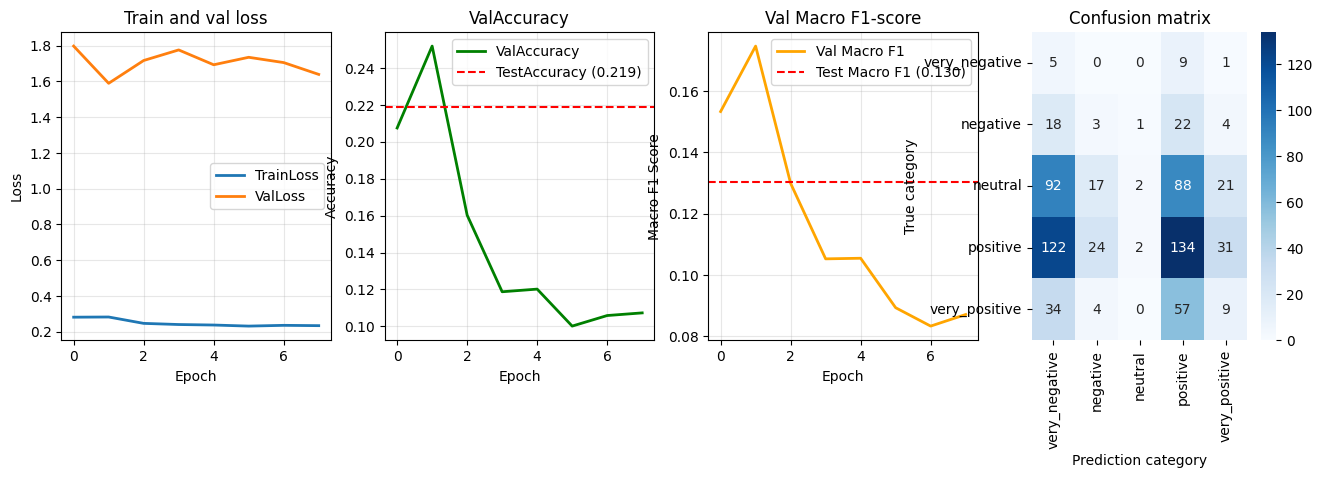

In [5]:
class ImageOnlyDataset(Dataset):
    """只使用图像的数据集"""
    def __init__(self, image_paths, labels, feature_extractor):
        self.image_paths = image_paths
        self.labels = labels
        self.feature_extractor = feature_extractor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        # 图像处理
        try:
            image = Image.open(image_path)
            if image.mode != 'RGB':
                image = image.convert('RGB')

            # 图像增强
            image = self.enhance_image(image)

            # 特征提取
            image_encoding = self.feature_extractor(image, return_tensors='pt')

        except Exception as e:
            print(f"图像处理失败 {image_path}: {e}")
            # fallback 白图
            image = Image.new('RGB', (224, 224), color=(255, 255, 255))
            image_encoding = self.feature_extractor(image, return_tensors='pt')

        return {
            'image_pixel_values': image_encoding['pixel_values'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long),
            'image_path': image_path
        }

    def enhance_image(self, image):
        """图像预处理增强"""
        try:
            if image.mode != 'RGB':
                image = image.convert('RGB')

            transform_list = []
            transform_list.append(transforms.RandomResizedCrop(224, scale=(0.8, 1.0)))
            transform_list.append(transforms.RandomHorizontalFlip(p=0.5))
            transform_list.append(transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.02))

            transform = transforms.Compose(transform_list + [
                transforms.Resize((224, 224)),
            ])

            pil_transformed = transform(image)

            # 锐化处理
            from PIL import ImageFilter
            pil_transformed = pil_transformed.filter(ImageFilter.UnsharpMask(radius=1, percent=120, threshold=1))

            return pil_transformed

        except Exception as e:
            print(f"图像增强失败，返回原图像: {e}")
            return image.convert('RGB') if image.mode != 'RGB' else image

class CBFocalLoss(nn.Module):
    """类平衡Focal Loss"""
    def __init__(self, samples_per_class, num_classes, beta=0.95, gamma=2.3, alpha=None, reduction='mean'):
        super(CBFocalLoss, self).__init__()
        samples_per_class = np.maximum(samples_per_class, 1)

        effective_num = 1.0 - np.power(beta, samples_per_class)
        weights = (1.0 - beta) / effective_num

        min_samples = np.min(samples_per_class)
        max_samples = np.max(samples_per_class)
        ratio = max_samples / (samples_per_class + 1e-6)

        combined_weights = weights * (ratio ** 0.5)
        combined_weights = combined_weights / np.sum(combined_weights) * num_classes

        self.class_weights = torch.tensor(combined_weights, dtype=torch.float32)
        self.num_classes = num_classes
        self.gamma = gamma
        self.reduction = reduction

        if alpha is None:
            inv_freq = 1.0 / (samples_per_class + 1e-6)
            alpha = inv_freq / inv_freq.sum()
            alpha = alpha / alpha.max()

        self.alpha = torch.tensor(alpha, dtype=torch.float32)

        print(f"CBFocalLoss配置:")
        print(f"  每类样本数: {samples_per_class}")
        print(f"  CB权重: {combined_weights}")
        print(f"  Alpha权重: {alpha}")

    def forward(self, logits, labels):
        device = logits.device
        weights = self.class_weights.to(device)
        alpha = self.alpha.to(device)

        log_probs = F.log_softmax(logits, dim=1)
        ce_loss = F.nll_loss(log_probs, labels, reduction='none')

        probs = torch.exp(log_probs)
        pt = probs.gather(1, labels.unsqueeze(1)).squeeze(1)
        pt = torch.clamp(pt, min=1e-7, max=1.0)

        focal_term = (1 - pt) ** self.gamma
        alpha_t = alpha[labels]
        cb_weights = weights[labels]

        loss = alpha_t * cb_weights * focal_term * ce_loss

        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss

class ImageOnlyClassifier(nn.Module):
    """只使用图像的情感分类器"""
    def __init__(self, num_classes=5, hidden_dim=256):
        super(ImageOnlyClassifier, self).__init__()

        # 图像编码器
        self.image_encoder = ViTModel.from_pretrained('google/vit-base-patch16-224')
        self.image_dim = self.image_encoder.config.hidden_size

        # 冻结部分层
        self._freeze_layers()

        # 分类网络
        self.classifier = nn.Sequential(
            nn.Linear(self.image_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.LayerNorm(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(hidden_dim // 2, hidden_dim // 4),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(hidden_dim // 4, num_classes)
        )

        self._init_weights()

    def _init_weights(self):
        for m in self.classifier.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def _freeze_layers(self):
        """冻结预训练模型的早期层"""
        if hasattr(self.image_encoder, 'embeddings'):
            for param in self.image_encoder.embeddings.parameters():
                param.requires_grad = False

        if hasattr(self.image_encoder, 'encoder'):
            total_layers = len(self.image_encoder.encoder.layer)
            freeze_layers = min(8, max(total_layers - 4, 0))
            for layer in self.image_encoder.encoder.layer[:freeze_layers]:
                for param in layer.parameters():
                    param.requires_grad = False

    def forward(self, image_pixel_values):
        # 图像编码
        image_outputs = self.image_encoder(pixel_values=image_pixel_values, output_attentions=True)
        image_features = image_outputs.last_hidden_state[:, 0]  # CLS token

        # 分类
        logits = self.classifier(image_features)

        # 获取注意力权重用于可视化
        image_attentions = image_outputs.attentions
        if image_attentions and len(image_attentions) > 0:
            last_layer_attention = image_attentions[-1]
            if len(last_layer_attention.shape) == 4 and last_layer_attention.shape[2] > 1:
                avg_attention = last_layer_attention.mean(dim=1)
                image_attn_weights = avg_attention[:, 0, 1:]
            else:
                image_attn_weights = None
        else:
            image_attn_weights = None

        return logits, image_attn_weights

class EarlyStopping:
    def __init__(self, patience=7, min_delta=0.001, restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_loss = None
        self.counter = 0
        self.best_weights = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(model)
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.save_checkpoint(model)
        else:
            self.counter += 1

        return self.counter >= self.patience

    def save_checkpoint(self, model):
        if self.restore_best_weights:
            self.best_weights = copy.deepcopy(model.state_dict())

    def restore(self, model):
        if self.best_weights is not None:
            model.load_state_dict(self.best_weights)

def calculate_class_distribution(labels, num_classes=5):
    class_counts = np.bincount(labels, minlength=num_classes)
    samples_per_class = class_counts[:num_classes]

    print(f"类别分布统计:")
    emotion_labels = ['very_negative', 'negative', 'neutral', 'positive', 'very_positive']
    for i, count in enumerate(samples_per_class):
        print(f"  类别 {i} ({emotion_labels[i]}): {count} 样本")

    return samples_per_class

def create_balanced_sampler(labels, minority_oversample_factor=8):
    labels = np.array(labels)
    class_counts = np.bincount(labels, minlength=5)

    minority_threshold = 900
    minority_classes = np.where(class_counts < minority_threshold)[0]

    base_weights = 1.0 / (class_counts + 1e-6)
    enhanced_weights = base_weights.copy()

    for cls_idx in minority_classes:
        enhanced_weights[cls_idx] *= minority_oversample_factor

    enhanced_weights = enhanced_weights / enhanced_weights.sum() * len(enhanced_weights)
    sample_weights = [enhanced_weights[label] for label in labels]

    print(f"  原始类别计数: {class_counts}")
    print(f"  少数类别: {minority_classes}")
    print(f"  增强权重: {enhanced_weights}")

    return sample_weights

def train_image_only_model(model, train_loader, val_loader, num_epochs=20, learning_rate=2e-5, save_dir=OUTPUT_DIR):
    """训练只使用图像的模型"""

    # 计算类别分布
    all_labels = []
    for batch in train_loader:
        all_labels.extend(batch['label'].tolist())
    samples_per_class = calculate_class_distribution(all_labels, num_classes=5)

    # 损失函数
    criterion = CBFocalLoss(
        samples_per_class=samples_per_class,
        num_classes=5,
        beta=0.99,
        gamma=1.5,
        alpha=None
    )

    # 优化器
    optimizer = optim.AdamW([
        {'params': model.image_encoder.parameters(), 'lr': learning_rate * 0.01, 'weight_decay': 1e-3},
        {'params': model.classifier.parameters(), 'lr': learning_rate, 'weight_decay': 2e-3}
    ], eps=1e-8, betas=(0.9, 0.999))

    # 学习率调度器
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.8, patience=3, min_lr=1e-7
    )

    # 早停
    early_stopping = EarlyStopping(patience=6, min_delta=0.002)
    best_val_macro_f1 = 0
    patience = 6
    patience_counter = 0

    # 记录训练过程
    train_losses = []
    val_losses = []
    val_accuracies = []
    val_f1_scores = []
    val_macro_f1_scores = []
    training_results = []

    emotion_labels = ['very_negative', 'negative', 'neutral', 'positive', 'very_positive']

    for epoch in range(num_epochs):
        print(f"\n{'='*60}")
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"{'='*60}")

        # 训练阶段
        model.train()
        total_train_loss = 0
        all_train_predictions = []
        all_train_labels = []
        num_batches = 0

        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1} 训练", unit="batch")

        for batch in train_pbar:
            optimizer.zero_grad()

            logits, _ = model(batch['image_pixel_values'].to(device))
            labels = batch['label'].to(device)

            # 主损失
            loss = criterion(logits, labels)

            # L1正则化
            l1_reg = torch.tensor(0., requires_grad=True)
            for name, param in model.named_parameters():
                if 'weight' in name and 'encoder' not in name:
                    l1_reg = l1_reg + torch.norm(param, 1)

            total_loss = loss + 1e-6 * l1_reg

            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.3)
            optimizer.step()

            total_train_loss += total_loss.item()
            num_batches += 1

            predictions = torch.argmax(logits, dim=1).cpu().numpy()
            labels_np = labels.cpu().numpy()
            all_train_predictions.extend(predictions)
            all_train_labels.extend(labels_np)

            train_pbar.set_postfix({'Loss': f'{total_loss.item():.4f}'})

        # 计算训练指标
        avg_train_loss = total_train_loss / num_batches
        train_f1 = f1_score(all_train_labels, all_train_predictions, average='weighted')
        train_macro_f1 = f1_score(all_train_labels, all_train_predictions, average='macro')
        train_losses.append(avg_train_loss)

        # 验证阶段
        print("\n验证中...")
        model.eval()
        total_val_loss = 0
        all_val_predictions = []
        all_val_labels = []

        with torch.no_grad():
            for batch in tqdm(val_loader, desc="验证", unit="batch"):
                logits, _ = model(batch['image_pixel_values'].to(device))
                labels = batch['label'].to(device)
                loss = criterion(logits, labels)
                total_val_loss += loss.item()

                predictions = torch.argmax(logits, dim=1).cpu().numpy()
                labels_np = labels.cpu().numpy()
                all_val_predictions.extend(predictions)
                all_val_labels.extend(labels_np)

        # 计算验证指标
        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = accuracy_score(all_val_labels, all_val_predictions)
        val_f1 = f1_score(all_val_labels, all_val_predictions, average='weighted')
        val_macro_f1 = f1_score(all_val_labels, all_val_predictions, average='macro')

        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)
        val_f1_scores.append(val_f1)
        val_macro_f1_scores.append(val_macro_f1)

        scheduler.step(val_macro_f1)

        # 生成验证集分类报告
        val_report = classification_report(all_val_labels, all_val_predictions,
                                         target_names=emotion_labels, digits=4)
        print(f"\n验证集分类报告:")
        print(val_report)

        # 检查改善情况
        improved = ""
        if val_macro_f1 > best_val_macro_f1:
            best_val_macro_f1 = val_macro_f1
            patience_counter = 0
            improved = "IMPROVING ★"
            torch.save(model.state_dict(), os.path.join(save_dir, 'best_image_only_model.pth'))
        else:
            patience_counter += 1
            improved = f"未改善 ({patience_counter}/{patience})"

        print(f"\nEpoch {epoch+1} 结果:")
        print(f"训练损失: {avg_train_loss:.4f}")
        print(f"训练F1: {train_f1:.4f}")
        print(f"训练Macro F1: {train_macro_f1:.4f}")
        print(f"验证损失: {avg_val_loss:.4f}")
        print(f"验证准确率: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
        print(f"验证F1: {val_f1:.4f}")
        print(f"验证Macro F1: {val_macro_f1:.4f}")
        print(f"{improved}")

        # 保存训练结果
        training_results.append({
            'epoch': epoch + 1,
            'train_loss': avg_train_loss,
            'train_f1': train_f1,
            'train_macro_f1': train_macro_f1,
            'val_loss': avg_val_loss,
            'val_accuracy': val_accuracy,
            'val_f1': val_f1,
            'val_macro_f1': val_macro_f1,
            'best_val_macro_f1': best_val_macro_f1,
            'patience_counter': patience_counter,
            'improved': improved
        })

        # 早停检查
        if early_stopping(avg_val_loss, model):
            print(f"\n早停触发! 连续{early_stopping.patience}轮未改善")
            early_stopping.restore(model)
            break

        if patience_counter >= patience:
            print(f"\n基于Macro F1的早停触发! 连续{patience}轮未改善")
            break

    # 保存训练结果
    results_df = pd.DataFrame(training_results)
    results_csv_path = os.path.join(save_dir, 'image_only_training_results.csv')
    results_df.to_csv(results_csv_path, index=False)
    print(f"\n训练结果已保存至: {results_csv_path}")

    return train_losses, val_losses, val_accuracies, val_f1_scores, val_macro_f1_scores

def prepare_data(labels_csv_path, images_dir):
    df = pd.read_csv(labels_csv_path)
    print(f"原始数据集大小: {len(df)}")

    emotion_map = {
        'very_positive': 4,
        'positive': 3,
        'neutral': 2,
        'negative': 1,
        'very_negative': 0
    }

    df['emotion_id'] = df['overall_sentiment'].map(emotion_map)
    df['full_path'] = df['image_name'].apply(lambda x: os.path.join(images_dir, x))

    existing_files = df[df['full_path'].apply(os.path.exists)]
    print(f"存在的图像文件: {len(existing_files)}")

    return existing_files

def main():
    df = prepare_data(CSV_FILE, IMAGE_DIR)

    # 数据分割
    train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['emotion_id'])
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['emotion_id'])

    print(f"数据分布:")
    print(f"  训练集: {len(train_df)} 样本")
    print(f"  验证集: {len(val_df)} 样本")
    print(f"  测试集: {len(test_df)} 样本")

    # 初始化特征提取器
    feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

    # 创建数据集
    train_dataset = ImageOnlyDataset(
        train_df['full_path'].tolist(),
        train_df['emotion_id'].tolist(),
        feature_extractor
    )

    val_dataset = ImageOnlyDataset(
        val_df['full_path'].tolist(),
        val_df['emotion_id'].tolist(),
        feature_extractor
    )

    test_dataset = ImageOnlyDataset(
        test_df['full_path'].tolist(),
        test_df['emotion_id'].tolist(),
        feature_extractor
    )

    # 创建采样器
    sample_weights = create_balanced_sampler(train_df['emotion_id'].tolist(), minority_oversample_factor=10)

    total_samples = len(train_df)
    num_samples_per_epoch = max(total_samples * 2, 8000)
    sampler = WeightedRandomSampler(sample_weights, num_samples=num_samples_per_epoch, replacement=True)

    # 创建数据加载器
    train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)

    # 初始化模型
    model = ImageOnlyClassifier(num_classes=5, hidden_dim=512)
    model.to(device)

    # 计算模型参数量
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"模型参数: 总计{total_params:,}, 可训练{trainable_params:,}")

    # 训练模型
    print(f"\n开始训练只使用图像的模型...")
    train_losses, val_losses, val_accuracies, val_f1_scores, val_macro_f1_scores = train_image_only_model(
        model, train_loader, val_loader, num_epochs=20, learning_rate=2e-5
    )

    # 加载最佳模型进行测试
    print(f"\n加载最佳模型进行测试...")
    model.load_state_dict(torch.load(os.path.join(OUTPUT_DIR, 'best_image_only_model.pth')))
    model.eval()

    # 测试评估
    all_test_predictions = []
    all_test_labels = []

    print("开始最终测试...")
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="测试", unit="batch"):
            logits, _ = model(batch['image_pixel_values'].to(device))
            predictions = torch.argmax(logits, dim=1).cpu().numpy()
            labels = batch['label'].cpu().numpy()

            all_test_predictions.extend(predictions)
            all_test_labels.extend(labels)

    # 计算最终指标
    test_accuracy = accuracy_score(all_test_labels, all_test_predictions)
    test_f1 = f1_score(all_test_labels, all_test_predictions, average='weighted')
    test_macro_f1 = f1_score(all_test_labels, all_test_predictions, average='macro')

    print(f"\n=== 最终测试结果 (只使用图像) ===")
    print(f"测试准确率: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"测试加权F1: {test_f1:.4f}")
    print(f"测试宏平均F1: {test_macro_f1:.4f}")

    # 详细分类报告
    emotion_labels = ['very_negative', 'negative', 'neutral', 'positive', 'very_positive']
    test_report = classification_report(all_test_labels, all_test_predictions,
                                       target_names=emotion_labels, digits=4)
    print(f"\n测试集详细分类报告:")
    print(test_report)

    # 保存测试结果
    test_results = {
        'model_type': 'image_only',
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'test_macro_f1': test_macro_f1,
        'classification_report': test_report
    }

    test_results_df = pd.DataFrame([test_results])
    test_csv_path = os.path.join(OUTPUT_DIR, 'image_only_test_results.csv')
    test_results_df.to_csv(test_csv_path, index=False)

    # 绘制训练曲线和混淆矩阵
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 4, 1)
    plt.plot(train_losses, label='TrainLoss', linewidth=2)
    plt.plot(val_losses, label='ValLoss', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and val loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 4, 2)
    plt.plot(val_accuracies, label='ValAccuracy', color='green', linewidth=2)
    plt.axhline(y=test_accuracy, color='red', linestyle='--', label=f'TestAccuracy ({test_accuracy:.3f})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('ValAccuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 4, 3)
    plt.plot(val_macro_f1_scores, label='Val Macro F1', color='orange', linewidth=2)
    plt.axhline(y=test_macro_f1, color='red', linestyle='--', label=f'Test Macro F1 ({test_macro_f1:.3f})')
    plt.xlabel('Epoch')
    plt.ylabel('Macro F1 Score')
    plt.title('Val Macro F1-score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 混淆矩阵
    plt.subplot(1, 4, 4)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(all_test_labels, all_test_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=emotion_labels, yticklabels=emotion_labels)
    plt.title('Confusion matrix')
    plt.xlabel('Prediction category')
    plt.ylabel('True category')

    # 创建最终汇总报告
    final_summary = {
        'model_name': 'Image Only Emotion Classifier',
        'total_params': total_params,
        'trainable_params': trainable_params,
        'train_samples': len(train_df),
        'val_samples': len(val_df),
        'test_samples': len(test_df),
        'final_test_accuracy': test_accuracy,
        'final_test_f1': test_f1,
        'final_test_macro_f1': test_macro_f1,
        'best_val_f1': max(val_f1_scores) if val_f1_scores else 0,
        'epochs_trained': len(train_losses),
        'image_encoder': 'google/vit-base-patch16-224'
    }

    summary_df = pd.DataFrame([final_summary])
    summary_csv_path = os.path.join(OUTPUT_DIR, 'image_only_model_summary.csv')
    summary_df.to_csv(summary_csv_path, index=False)

    print(f"\n训练完成，文件保存路径: {OUTPUT_DIR}")
    print(f"最佳模型: {OUTPUT_DIR}best_image_only_model.pth")
    print(f"训练结果CSV: {OUTPUT_DIR}image_only_training_results.csv")
    print(f"测试结果CSV: {OUTPUT_DIR}image_only_test_results.csv")
    print(f"训练曲线图: {OUTPUT_DIR}image_only_training_analysis.png")
    print(f"模型汇总: {OUTPUT_DIR}image_only_model_summary.csv")

if __name__ == "__main__":
    main()